In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

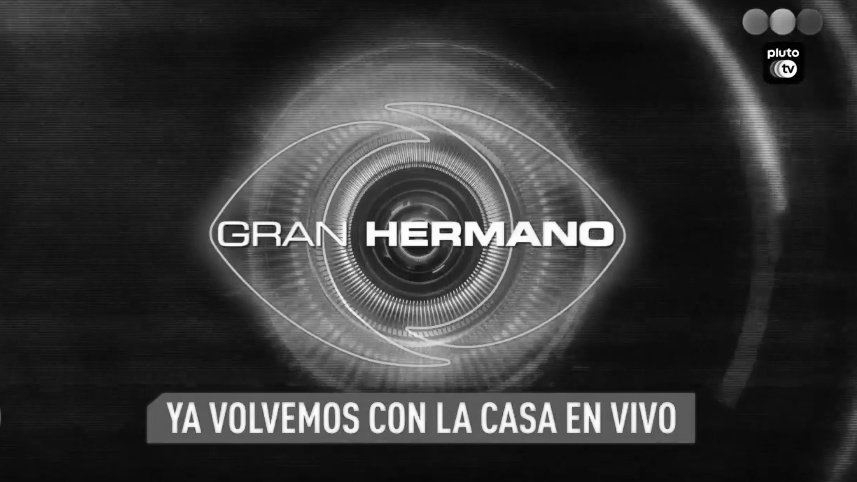

In [ ]:
img = cv2.imread("RECOGNITION_EXPERIMENT.jpg")
greyed_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(greyed_img)

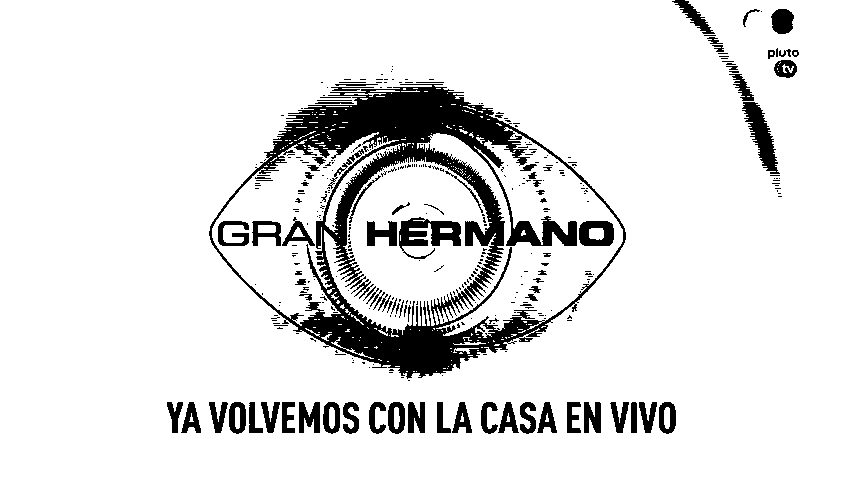

In [ ]:
thresholded_img = cv2.threshold(greyed_img, 125, 255, cv2.THRESH_BINARY_INV)[1]

cv2_imshow(thresholded_img)

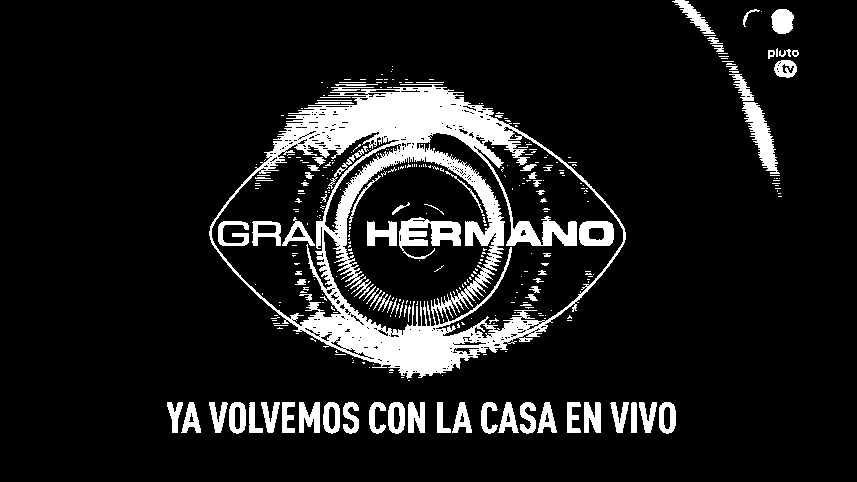

In [ ]:
_, threshold_img = cv2.threshold(greyed_img, 125, 255, cv2.THRESH_BINARY)

cv2_imshow(threshold_img)

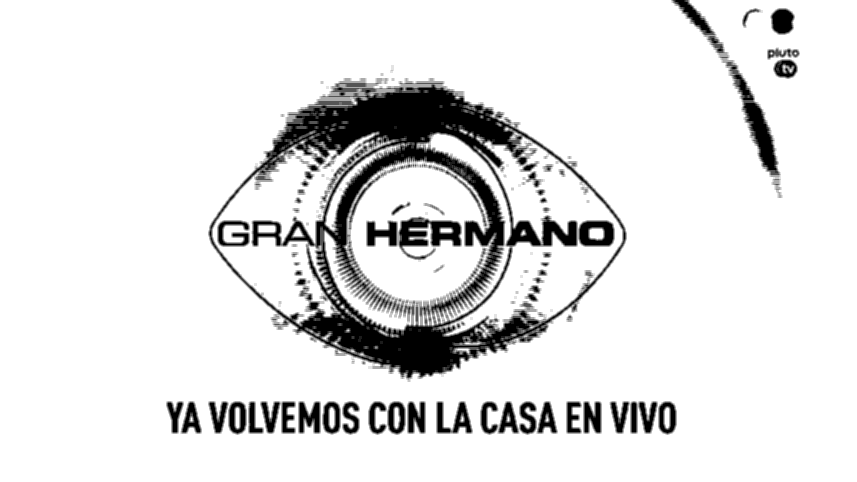

In [ ]:
filtered_image = cv2.blur(thresholded_img, (3,3))

cv2_imshow(filtered_image)

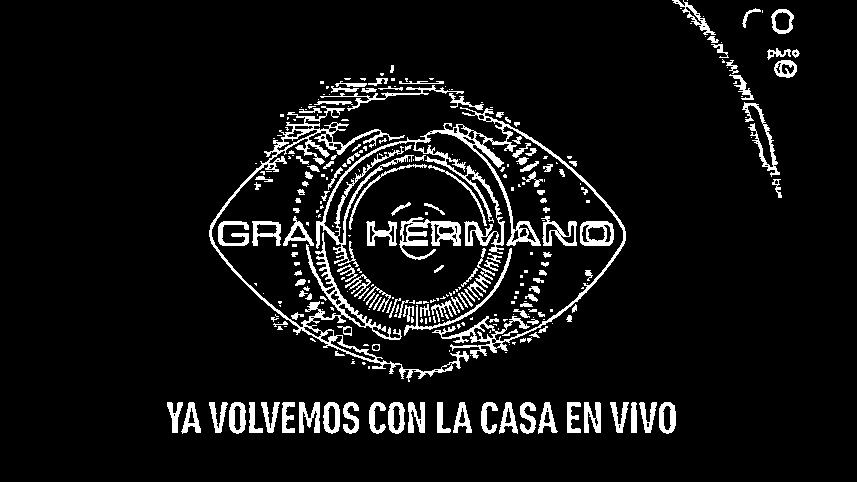

In [ ]:
adap_threshold_img = cv2.adaptiveThreshold(filtered_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 13)

cv2_imshow(adap_threshold_img)

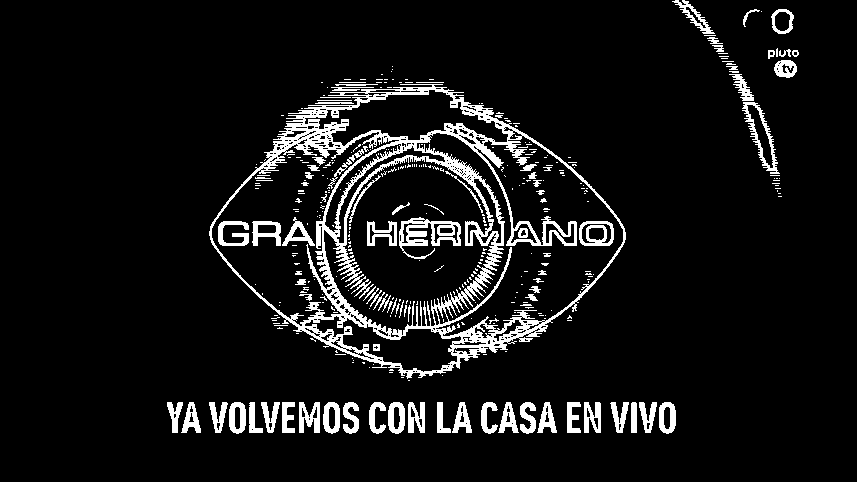

In [ ]:
adap_threshold_img = cv2.adaptiveThreshold(thresholded_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 13)

cv2_imshow(adap_threshold_img)

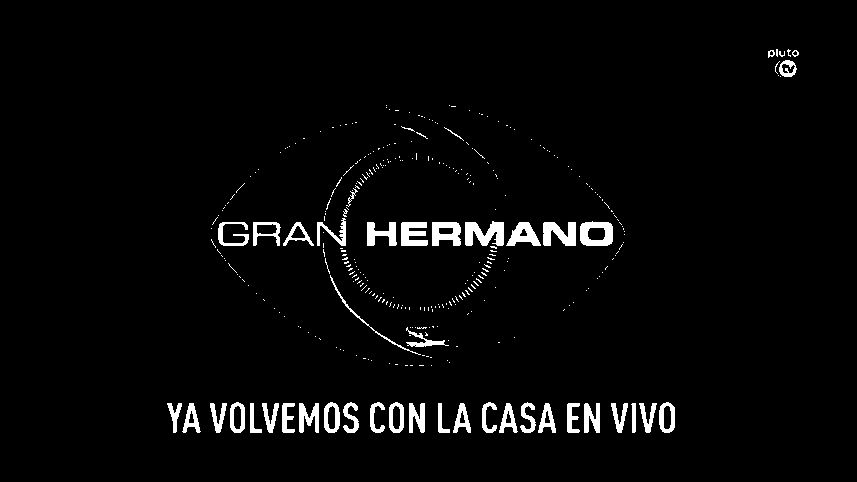

In [ ]:
_, threshold_img = cv2.threshold(greyed_img, 195, 255, cv2.THRESH_BINARY)

cv2_imshow(threshold_img)

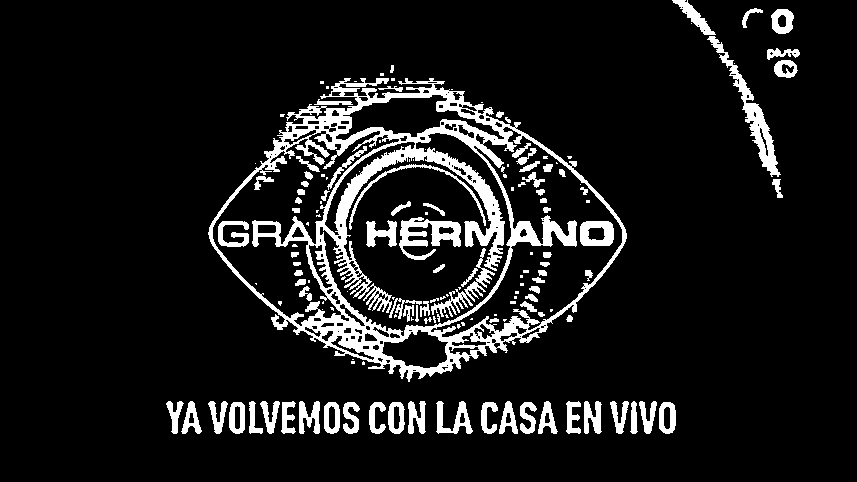

In [ ]:
adap_threshold_img = cv2.adaptiveThreshold(filtered_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)

cv2_imshow(adap_threshold_img)

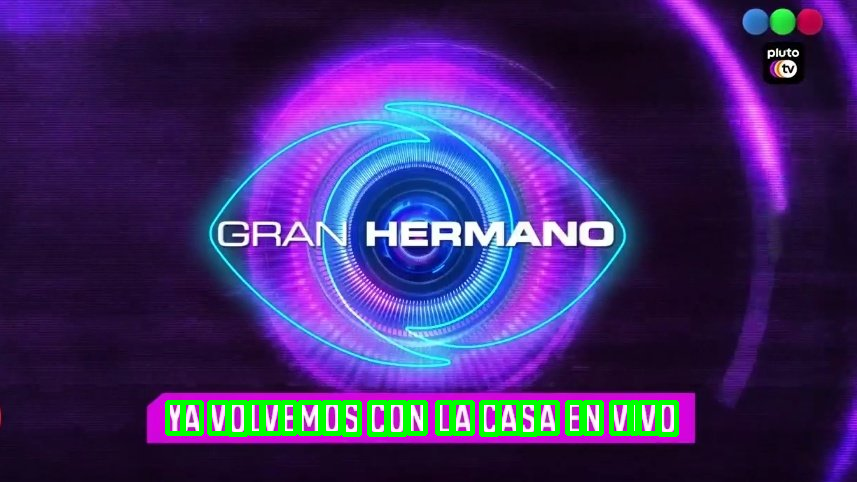

In [ ]:
contours = cv2.findContours(filtered_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

RATIO = 0.5417  # cagó la I kjjj

candidates = []
for cnt in contours:
  x, y, w, h = cv2.boundingRect(cnt)
  aspect_ratio = float(w) / h
  if (
      np.isclose(aspect_ratio, RATIO, atol=0.35)
      and
      30 > w > 5
      and
      42 > h > 25
  ):
    candidates.append(cnt)

img = cv2.imread("RECOGNITION_EXPERIMENT.jpg")

for cnt in candidates:
  x, y, w, h = cv2.boundingRect(cnt)
  cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2_imshow(img)

## PASADO A LIMPIO  JEJE

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

Imagen original

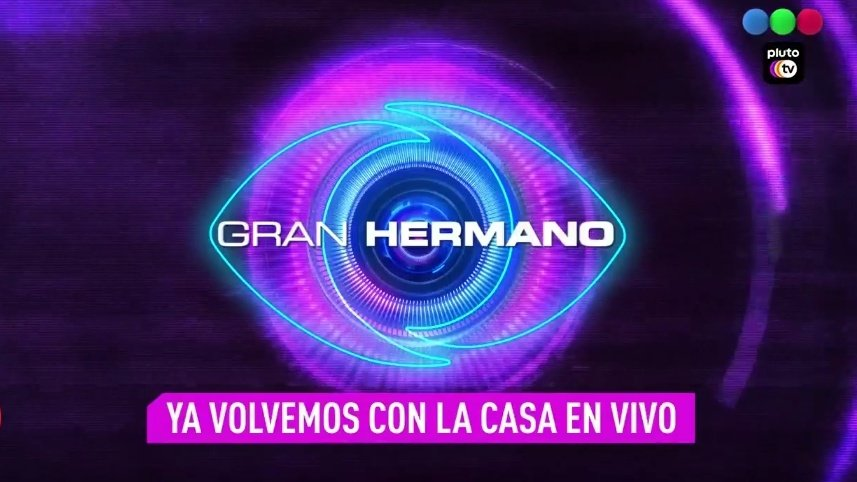

In [ ]:
img = cv2.imread("RECOGNITION_EXPERIMENT.jpg")
cv2_imshow(img)

In [ ]:
TEXT_MAX_WIDTH = 26
TEXT_MIN_WIDTH = 5  # LA "I" DE MIERDA
TEXT_MAX_HEIGHT = 36
TEXT_MIN_HEIGHT = 30
TEXT_ASPECT_RATIO = 0.5417  # TOMANDO COMO REFERENCIA LA "Y"
TEXT_MIN_Y = img.shape[0] / 2 + 66.8

IMAGEN A ESCALA DE GRISES

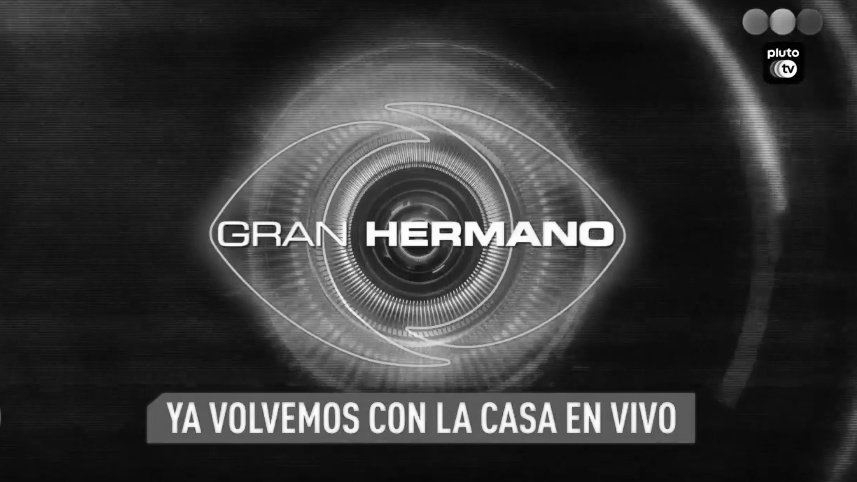

In [ ]:
greyed_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(greyed_img)

Imagen blanco y negro

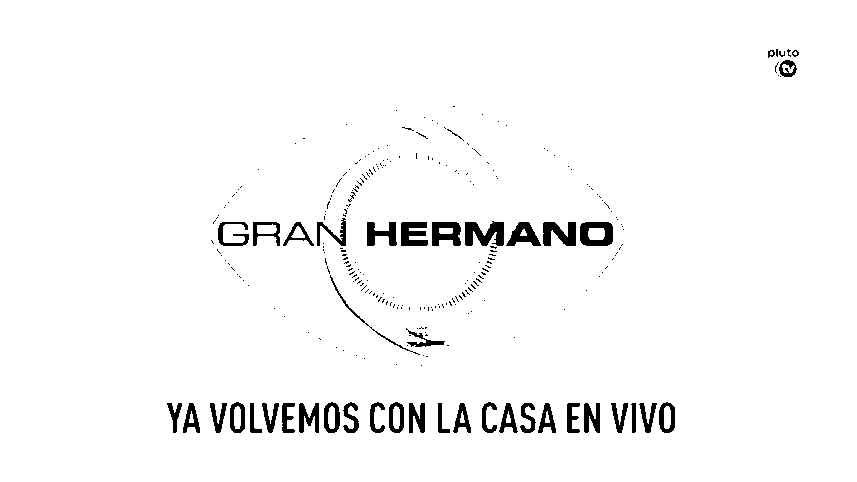

In [ ]:
threshold_img = cv2.threshold(greyed_img, 198, 255, cv2.THRESH_BINARY_INV)[1]

cv2_imshow(threshold_img)

Imagen blanco y negro better hehe

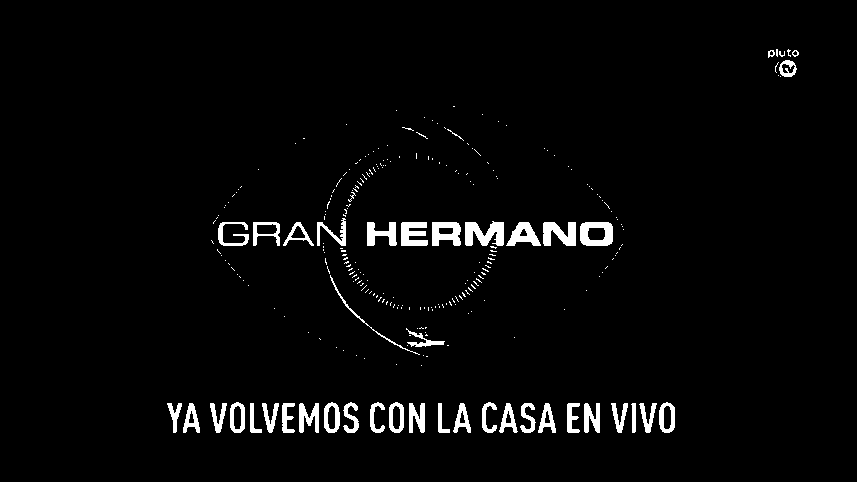

In [35]:
filtered_image = cv2.adaptiveThreshold(threshold_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)

cv2_imshow(filtered_image)

In [ ]:
TEXT_MAX_WIDTH = 30
TEXT_MIN_WIDTH = 5  # LA "I" DE MIERDA
TEXT_MAX_HEIGHT = 38
TEXT_MIN_HEIGHT = 30
TEXT_ASPECT_RATIO = 0.5417  # TOMANDO COMO REFERENCIA LA "Y"
TEXT_MIN_Y = img.shape[0] / 2 + 66.8

31.0


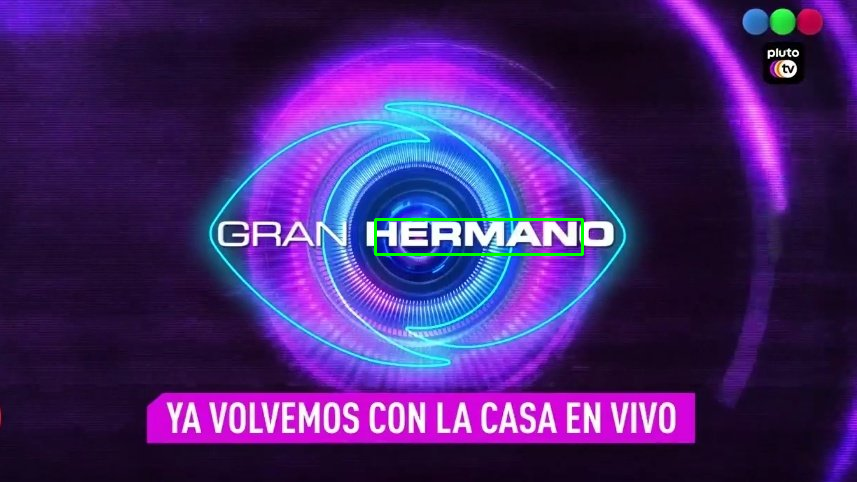

In [28]:
template = cv2.imread("WE_BACK_SCREEN_TRANSFORMED.jpg")
template_img = cv2.adaptiveThreshold(cv2.threshold(cv2.cvtColor(template, cv2.COLOR_BGR2GRAY), 195, 255, cv2.THRESH_BINARY_INV)[1], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)
match_result = cv2.matchTemplate(filtered_image, template_img, cv2.TM_CCOEFF_NORMED)

height, width, _ = template.shape

_, max_val, min_loc, max_loc = cv2.minMaxLoc(match_result)

print(round(max_val, 2) * 100)

img_copy = img.copy()

cv2.rectangle(img_copy, max_loc, (max_loc[0] + width, max_loc[1] + height), (0, 255, 0), 2)
cv2_imshow(img_copy)

56.00000000000001


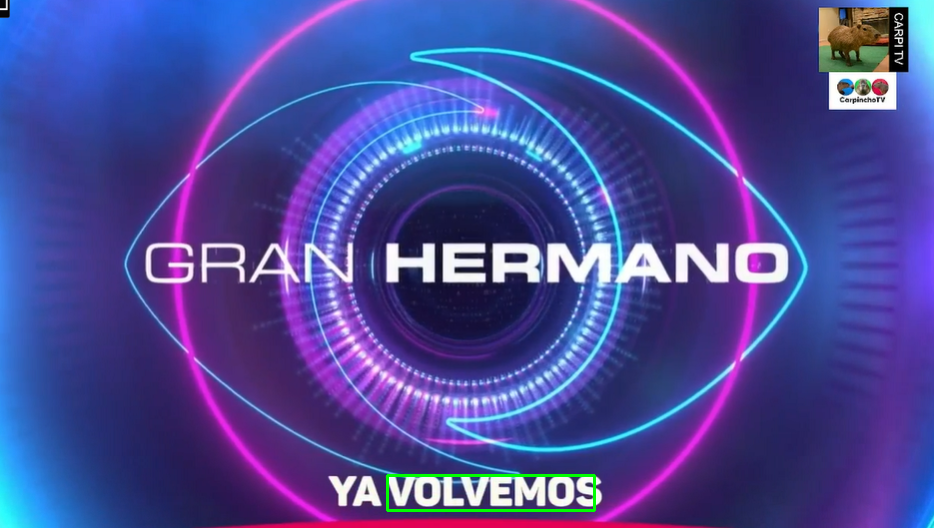

In [32]:

img_2_o = cv2.imread("BE_RIGHT_BACK_SCREEN.PNG")
img_2 = cv2.adaptiveThreshold(cv2.threshold(cv2.cvtColor(img_2_o, cv2.COLOR_BGR2GRAY), 195, 255, cv2.THRESH_BINARY_INV)[1], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)

match_result = cv2.matchTemplate(img_2, template_img, cv2.TM_CCOEFF_NORMED)

height, width, _ = template.shape

_, max_val, min_loc, max_loc = cv2.minMaxLoc(match_result)

print(round(max_val, 2) * 100)

img_copy = img_2_o.copy()

cv2.rectangle(img_copy, max_loc, (max_loc[0] + width, max_loc[1] + height), (0, 255, 0), 2)
cv2_imshow(img_copy)

Obtener contornos y aplicarles filtración mediante list comprenhension

In [25]:
TEXT_MAX_WIDTH = 36
TEXT_MIN_WIDTH = 5  # LA "I" DE MIERDA
TEXT_MAX_HEIGHT = 45
TEXT_MIN_HEIGHT = 30
TEXT_ASPECT_RATIO = 0.5417  # TOMANDO COMO REFERENCIA LA "Y"
TEXT_MIN_Y = img.shape[0] / 2 + 76.8

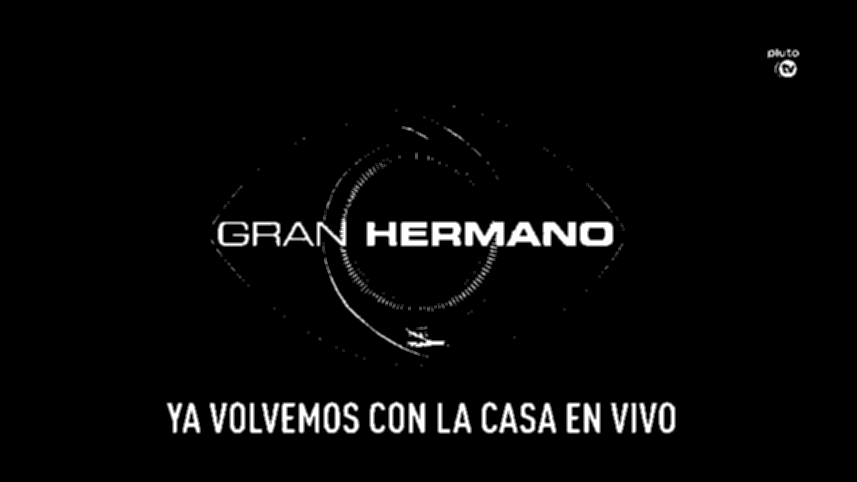

In [40]:
cv2_imshow(cv2.blur(filtered_image, (3,3)))

167 403 , 659 402


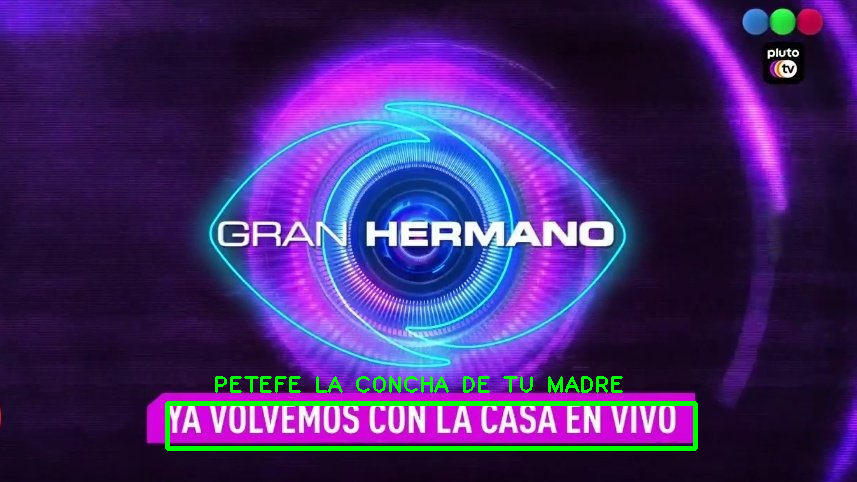

In [69]:
contours = cv2.findContours(filtered_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

filtered_cnts = []
filtered_cnts_points = []

img_copy = img.copy()

for cnt in contours:
  x, y, width, height = cv2.boundingRect(cnt)

  if y < TEXT_MIN_Y:
    continue
  # https://stackoverflo
  aspect_ratio = width / height

  #if not np.isclose(aspect_ratio, 0.864, atol=0.35):
  #  continue
  # el radio de aspecto se me hace medio al pedo, ya q la mayoría de contornos tienen el mismo size q las letras, se filtran? Sí, pero muy poca diff hay entre filtrar por ratio y no

  if (
      (30 > width >= 5) and
      (35 > height >= 27)
     ):
    filtered_cnts.append(cnt)
    filtered_cnts_points.append((x, y))

img_copy = img.copy()

min_x, min_y = min(filtered_cnts_points, key=lambda point: point[0])
max_x, max_y = max(filtered_cnts_points, key=lambda point: point[0])


cv2.rectangle(
  img_copy,
  (min_x, min_y),
  (max_x + TEXT_MAX_WIDTH, min_y + TEXT_MAX_HEIGHT),
  (0, 255, 0),
  3
)
TEXT_OFFSET = 10
MIDDLE_X = (min_x + max_x) // 2 - TEXT_OFFSET * 20
MIDDLE_Y = (min_y + max_y) // 2 - TEXT_OFFSET
cv2.putText(
  img_copy,
  "PETEFE LA CONCHA DE TU MADRE",
  (MIDDLE_X, MIDDLE_Y),
  cv2.FONT_HERSHEY_PLAIN,
  1.5,
  (0, 255, 0),
  2
)

"""
for cnt in filtered_cnts:
  x, y, w, h = cv2.boundingRect(cnt)
  cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 3)
"""
print(min_x, min_y, ",", max_x, max_y)
cv2_imshow(img_copy)

In [43]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import pytesseract

In [45]:
cv2.imwrite("BE_RIGHT_BACK.jpg", img[402:402 + TEXT_MAX_HEIGHT, 167:659 + TEXT_MAX_WIDTH], [cv2.IMWRITE_JPEG_QUALITY, 90])

True

In [46]:
import os

print(os.path.basename("dfgd/fgggff/wea.jpg"))

wea.jpg


['rgb(32,13,57)', 'rgb(146,41,211)', 'rgb(131,165,234)']


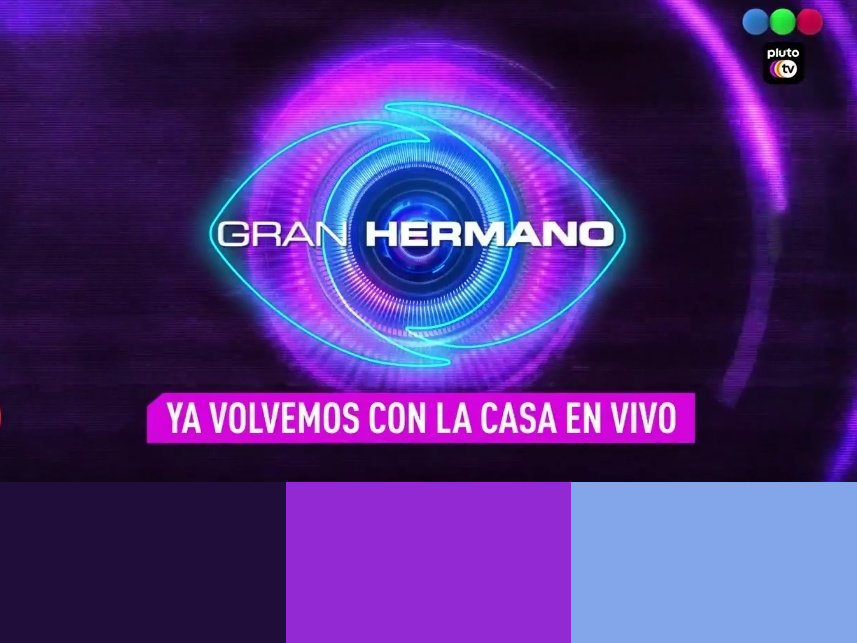

In [67]:
# https://stackoverflow.com/a/73821164/10942774
data = cv2.resize(img, (100, 100)).reshape(-1, 3)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
n_clusters = 3
compactness, labels, centers = cv2.kmeans(data.astype(np.float32), n_clusters, None, criteria, 10, flags)

cluster_sizes = np.bincount(labels.flatten())

palette=[]
for cluster_idx in np.argsort(-cluster_sizes):
    palette.append(centers[cluster_idx].astype(int))


palette_2 = np.hstack([np.full((img.shape[0], img.shape[1], 3), fill_value=color, dtype=np.uint8) for color in palette])
sf = img.shape[1] / palette_2.shape[1]
out = np.vstack([img, cv2.resize(palette_2, (0, 0), fx=sf, fy=sf)])

print([f"rgb({','.join(rgb[::-1].astype(str))})" for rgb in palette])
cv2_imshow(out)